# Sales Analysis 2019

In this notebook I practice data cleaning and data visualization using a real world [Sales Dataset](./sales_data/2019/).

## Imports

In [5]:
# importing the libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as mpl
from itertools import combinations
from collections import Counter

## Importing and merging all the Sales Data 

In [6]:
# Reading a dataset from the folder
data_filepath = './data/sales_data/2019/Sales_April_2019.csv'
data = pd.read_csv(data_filepath)
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [7]:
# Reading all data from ./sales_data/2019/ and merged it in one dataset.
files = [file for file in os.listdir('./data/sales_data/2019/')]

sales_data = pd.DataFrame()

for file in files:
    data = pd.read_csv('./data/sales_data/2019/' + file)
    sales_data = pd.concat([sales_data, data])

sales_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
13617,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
13618,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
13619,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
13620,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"


In [8]:
# Exporting the data as a csv file.
sales_data.to_csv('./data/sales_data/output/all_sales_data.csv', index = False)

In [9]:
# Reading the updated dataframe
sales_data_2019 = pd.read_csv('./data/sales_data/output/all_sales_data.csv')
sales_data_2019

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"


## Question 01: What was the best month for sales? How much was earned that month?

### Creating the months column

In [10]:
# We convert the Order Date to a String then getting the first two characters of the String
sales_data_2019['Month'] = sales_data_2019['Order Date'].str[0:2]

### Data Cleaning: Removing the `'Or'` values
After using the `astype()` a `ValueError: invalid literal for int() with base 10: 'Or'` will be encounted.

To fix this we Find the `Or` value and remove it from the data.

In [11]:
# To filter out the data that has no 'Or' replace the != to == 
sales_data_2019 = sales_data_2019[sales_data_2019['Order Date'].str[0:2] != 'Or']

#### Observation 02: `355` Rows have the values that have the same header names.

### Data Cleaning: Remove the `'NaN'` values
The code below removes the `ValueError: cannot convert float NaN to integer`

In [12]:
nan_data = sales_data_2019[sales_data_2019.isna().any(axis=1)]
nan_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
264,NaN,NaN,NaN,NaN,NaN,NaN,NaN
648,NaN,NaN,NaN,NaN,NaN,NaN,NaN
680,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1385,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1495,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
185795,NaN,NaN,NaN,NaN,NaN,NaN,NaN
185868,NaN,NaN,NaN,NaN,NaN,NaN,NaN
185887,NaN,NaN,NaN,NaN,NaN,NaN,NaN
185960,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Observation 01: There are `545` NaN Rows

In [13]:
sales_data_2019 = sales_data_2019.dropna(how='all')

### Converting the Month Column to an `Int` datatype

In [14]:
#  Converting the Month column to an Int.
sales_data_2019['Month'] = sales_data_2019['Month'].astype('int32')
sales_data_2019

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12
...,...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215",6
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001",6
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016",6
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016",6


### Data Cleaning: Coverting the Columns into Int

In [15]:
# Make Int
sales_data_2019['Quantity Ordered'] = pd.to_numeric(sales_data_2019['Quantity Ordered'])

# Make Float
sales_data_2019['Price Each'] = pd.to_numeric(sales_data_2019['Price Each'])

### Adding a Sales Column

In [16]:
sales_data_2019['Sales'] = (sales_data_2019['Price Each'] * sales_data_2019['Quantity Ordered'])
sales_data_2019

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95
...,...,...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215",6,2.99
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001",6,149.99
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016",6,11.95
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016",6,11.95


In [17]:
answer01 = sales_data_2019.groupby('Month').sum()
answer01

/var/folders/7z/xcyqwmm15gjg8jt06kdf21fr0000gn/T/ipykernel_3707/728862236.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  answer01 = sales_data_2019.groupby('Month').sum()


,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


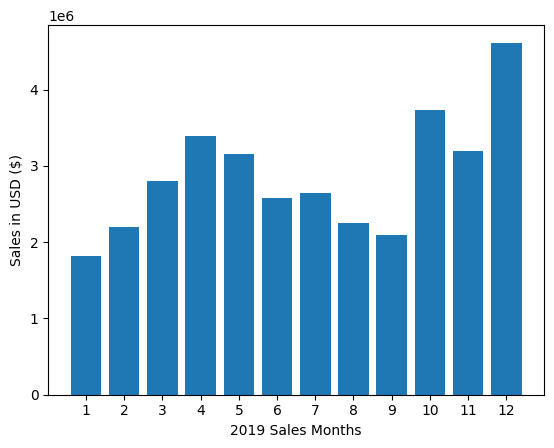

In [18]:
# Adding a Barchart

# x-value
months = range(1,13)

mpl.bar(months, answer01['Sales'])
mpl.xticks(months)
mpl.xlabel('2019 Sales Months')
mpl.ylabel('Sales in USD ($)')

mpl.show()

## Answer: `December` was the best month with sales of `$4,613,443.34`

## Question 02: What city had the highest number of sales?

In [19]:
# Getting the City name from the Purchase address.
def get_city_name(address):
    """
    This function is getting the Purchase Address, splitting it into 3 parts and getting
    the 2nd content which are the City names.
    """
    return address.split(',')[1]

def get_state(address):
    """
    This function is getting the city's state name which is a 2 character word by getting the
    3rd content splitting it by a space and getting the 1 index.
    """
    return address.split(',')[2].split(' ')[1]
    

sales_data_2019['City'] = sales_data_2019['Purchase Address'].apply(lambda x: f"{get_city_name(x)} ({get_state(x)})")
sales_data_2019

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY)
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY)
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY)
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA)
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA)
...,...,...,...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215",6,2.99,Boston (MA)
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001",6,149.99,New York City (NY)
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016",6,11.95,San Francisco (CA)
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016",6,11.95,San Francisco (CA)


In [20]:
# Dropping the Months Column
city_sales = sales_data_2019.drop(columns='Month')

In [21]:
answer02 = city_sales.groupby('City').sum()
answer02

/var/folders/7z/xcyqwmm15gjg8jt06kdf21fr0000gn/T/ipykernel_3707/3701107120.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  answer02 = city_sales.groupby('City').sum()


,Quantity Ordered,Price Each,Sales
City,,,
Atlanta (GA),16602,2779908.20,2795498.58
Austin (TX),11153,1809873.61,1819581.75
Boston (MA),22528,3637409.77,3661642.01
Dallas (TX),16730,2752627.82,2767975.40
Los Angeles (CA),33289,5421435.23,5452570.80
New York City (NY),27932,4635370.83,4664317.43
Portland (ME),2750,447189.25,449758.27
Portland (OR),11303,1860558.22,1870732.34
San Francisco (CA),50239,8211461.74,8262203.91


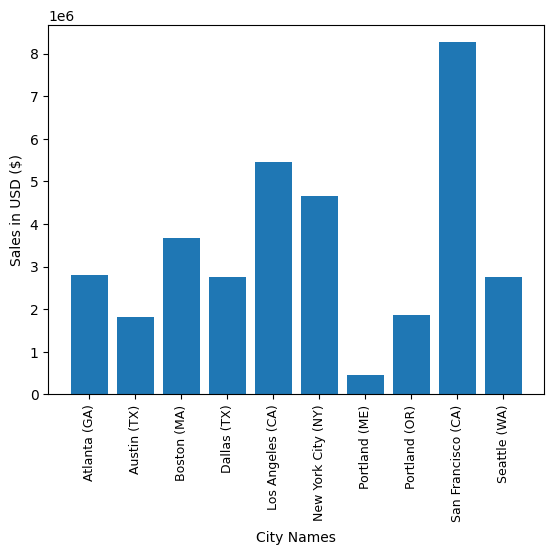

In [22]:
# Adding a Barchart

# x-value (List Comprehension)
cities = [ city for city, df in city_sales.groupby('City')]

mpl.bar(cities, answer02['Sales'])
mpl.xticks(cities, rotation = 'vertical', size = 9)
mpl.xlabel('City Names')
mpl.ylabel('Sales in USD ($)')

mpl.show()

## Answer: `San Francisco (CA)`

## Question 03: What time should we display advertisements to maximize likelihood of customer's buying product?

In [23]:
# Converting the Order Date column to datetime
sales_data_2019['Order Date'] = pd.to_datetime(sales_data_2019['Order Date'])

In [24]:
sales_data_2019['Hour'] = sales_data_2019['Order Date'].dt.hour
sales_data_2019['Minute'] = sales_data_2019['Order Date'].dt.minute

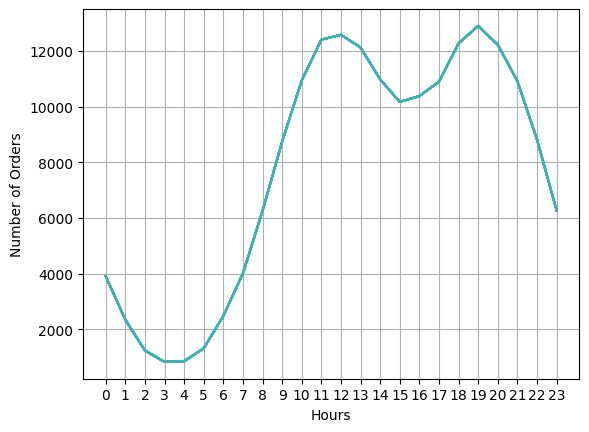

In [25]:
hours = [ hour for hour, df in sales_data_2019.groupby('Hour')]

mpl.plot(hours, sales_data_2019.groupby(['Hour']).count())
mpl.xticks(hours)
mpl.xlabel('Hours')
mpl.ylabel('Number of Orders')
mpl.grid()

mpl.show()

## Answer: The Ads should be displayed between `09:30` and `21:00` which are just before and after the buying peaks.

## Question 04: What products are often sold together?

In [26]:
duplicate_orders = sales_data_2019[sales_data_2019['Order ID'].duplicated(keep=False)]
duplicate_orders

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
16,295681,Google Phone,1,600.00,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,600.00,Boston (MA),12,37
17,295681,USB-C Charging Cable,1,11.95,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.95,Boston (MA),12,37
18,295681,Bose SoundSport Headphones,1,99.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,99.99,Boston (MA),12,37
19,295681,Wired Headphones,1,11.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.99,Boston (MA),12,37
36,295698,Vareebadd Phone,1,400.00,2019-12-13 14:32:00,"175 1st St, New York City, NY 10001",12,400.00,New York City (NY),14,32
...,...,...,...,...,...,...,...,...,...,...,...
186820,222882,AA Batteries (4-pack),1,3.84,2019-06-18 11:37:00,"990 Walnut St, Los Angeles, CA 90001",6,3.84,Los Angeles (CA),11,37
186822,222884,Google Phone,1,600.00,2019-06-04 12:06:00,"819 Pine St, New York City, NY 10001",6,600.00,New York City (NY),12,6
186823,222884,USB-C Charging Cable,1,11.95,2019-06-04 12:06:00,"819 Pine St, New York City, NY 10001",6,11.95,New York City (NY),12,6
186842,222903,iPhone,1,700.00,2019-06-07 22:21:00,"685 Hickory St, New York City, NY 10001",6,700.00,New York City (NY),22,21


In [27]:
duplicate_orders['Grouped Products'] = duplicate_orders.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
sold_together = duplicate_orders[['Order ID', 'Grouped Products']].drop_duplicates()
sold_together

/var/folders/7z/xcyqwmm15gjg8jt06kdf21fr0000gn/T/ipykernel_3707/167284161.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicate_orders['Grouped Products'] = duplicate_orders.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped Products
16,295681,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,"Vareebadd Phone,USB-C Charging Cable"
42,295703,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,295726,"iPhone,Lightning Charging Cable"
76,295735,"iPhone,Apple Airpods Headphones,Wired Headphones"
...,...,...
186798,222863,"27in FHD Monitor,Bose SoundSport Headphones"
186804,222868,"iPhone,Apple Airpods Headphones"
186819,222882,"Apple Airpods Headphones,AA Batteries (4-pack)"
186822,222884,"Google Phone,USB-C Charging Cable"


In [28]:
count = Counter()

for row in sold_together['Grouped Products']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key, value in count.most_common(5):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361


## Answer: 
```
('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
```

## Question 05: What product sold the most and why do you think it sold the most?

In [29]:
sales_data_2019.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY),0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY),7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY),18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA),15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA),12,38


In [30]:
product_group = sales_data_2019.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']
print(quantity_ordered)

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64


/var/folders/7z/xcyqwmm15gjg8jt06kdf21fr0000gn/T/ipykernel_3707/2085300594.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quantity_ordered = product_group.sum()['Quantity Ordered']


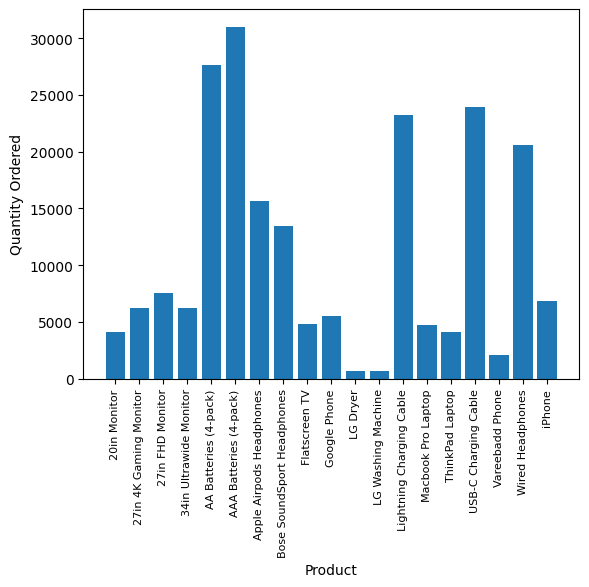

In [31]:
# Ploting
products = [product for product, df in product_group]

mpl.bar(products, quantity_ordered)
mpl.ylabel('Quantity Ordered')
mpl.xlabel('Product')
mpl.xticks(products, rotation = 'vertical', size = 8)
mpl.show()

## Answer: `AAA Batteries (4 pack)`

/var/folders/7z/xcyqwmm15gjg8jt06kdf21fr0000gn/T/ipykernel_3707/4280368101.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prices = sales_data_2019.groupby('Product').mean()['Price Each']
/var/folders/7z/xcyqwmm15gjg8jt06kdf21fr0000gn/T/ipykernel_3707/4280368101.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation = 'vertical', size = 8)


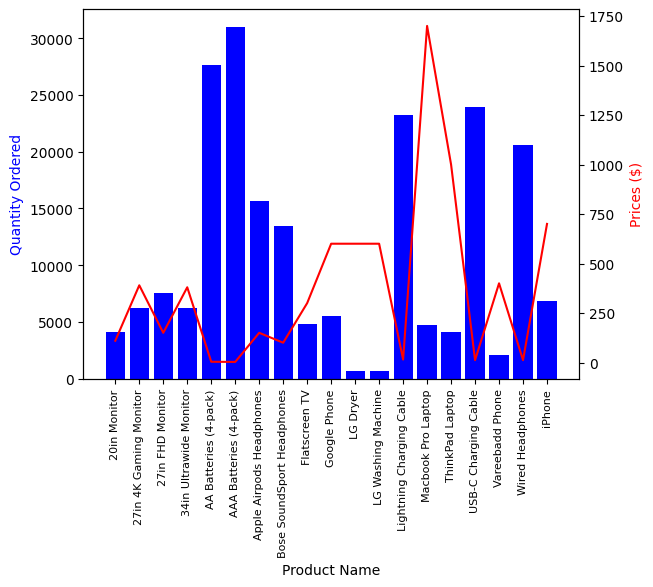

In [32]:
prices = sales_data_2019.groupby('Product').mean()['Price Each']

# Adding a second plot to the first plot
fig, ax1 = mpl.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color = 'b')
ax2.plot(products, prices, color = 'r')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color = 'b')
ax2.set_ylabel('Prices ($)', color = 'r')
ax1.set_xticklabels(products, rotation = 'vertical', size = 8)

mpl.show()